In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv(r"C:\Users\Diya\Downloads\breast_cancer_encoded_dataset.csv")  

# Display the first few rows of the dataset
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())
print("\nFirst 5 Rows of Dataset:")
print(data.head())
print("\nSummary Statistics:")
print(data.describe())

Dataset Shape: (569, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius             569 non-null    float64
 1   texture            569 non-null    float64
 2   perimeter          569 non-null    float64
 3   area               569 non-null    float64
 4   smoothness         569 non-null    float64
 5   compactness        569 non-null    float64
 6   concavity          569 non-null    float64
 7   symmetry           569 non-null    float64
 8   Fractal_Dimension  569 non-null    float64
 9   diagnosis_encoded  569 non-null    int64  
 10  diagnosis_B        569 non-null    int64  
 11  diagnosis_M        569 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 53.5 KB
None

First 5 Rows of Dataset:
   radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     1

In [5]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
concavity            0
symmetry             0
Fractal_Dimension    0
diagnosis_encoded    0
diagnosis_B          0
diagnosis_M          0
dtype: int64


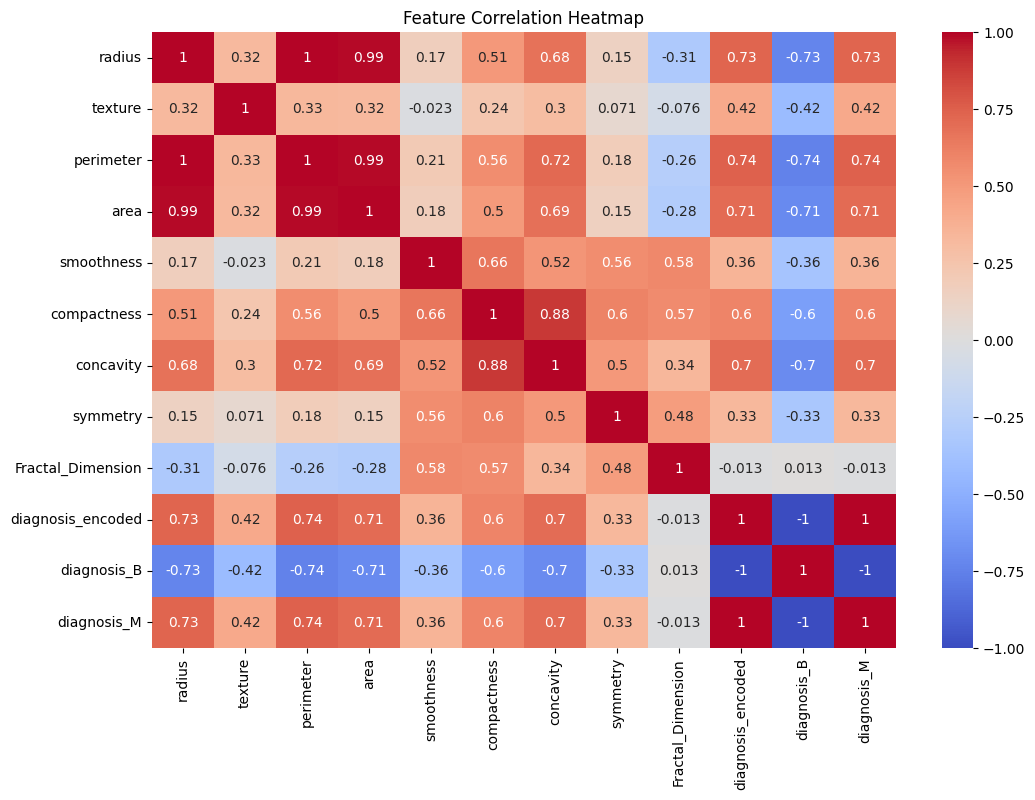

In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

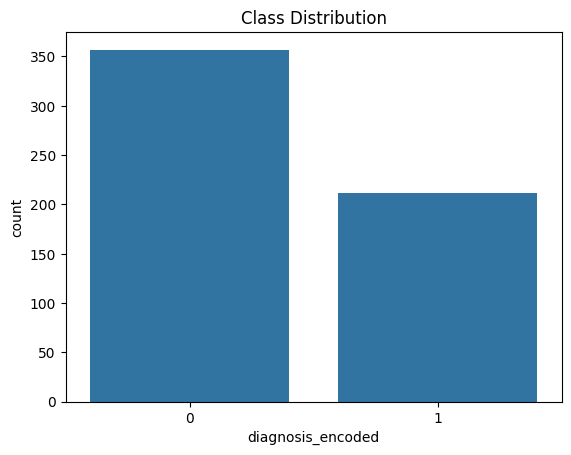

In [7]:
# Visualize class distribution
sns.countplot(x='diagnosis_encoded', data=data)
plt.title("Class Distribution")
plt.show()

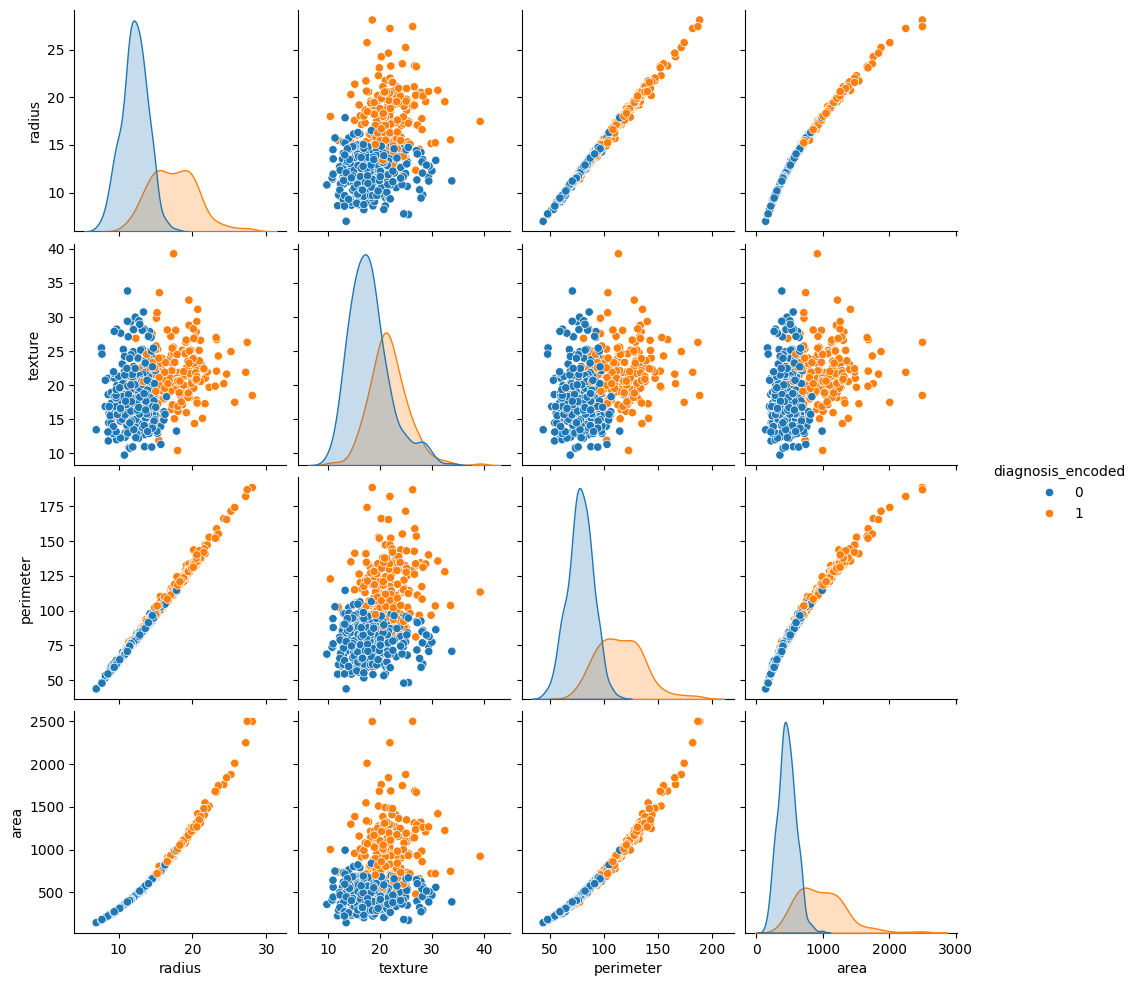

In [8]:
import seaborn as sns

# Select features and target variable for visualization
selected_features = ['radius', 'texture', 'perimeter', 'area']
sns.pairplot(data[selected_features + ['diagnosis_encoded']], hue='diagnosis_encoded', diag_kind='kde')
plt.show()

In [9]:
# Define features (X) and target (y)
X = df.drop(columns=['diagnosis_encoded'])  # Drop the target column
y = df['diagnosis_encoded']  # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Multi-Layer Perceptron (MLP) Model
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[72  0]
 [ 0 42]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        42

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114


Accuracy Score: 1.0


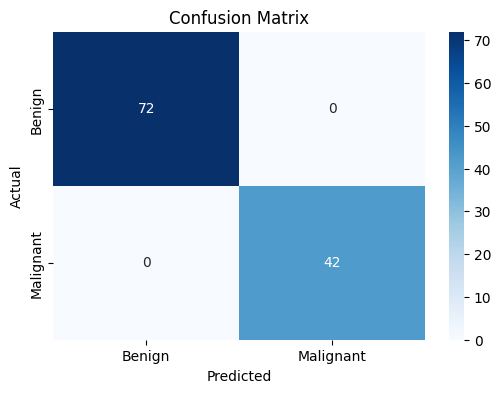

In [10]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

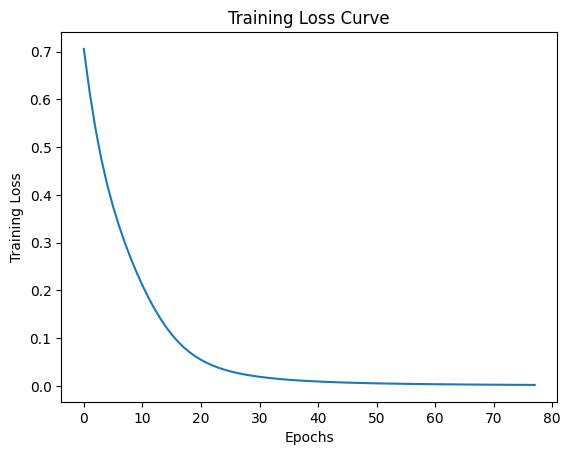

In [11]:
# Plot training loss curve
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss Curve")
plt.show()

In [12]:
# The training loss decreases steadily, indicating that the model is learning effectively.  
# The curve flattens after several epochs, suggesting the model has converged to an optimal solution.  
# There is no sharp increase, meaning the model is not facing instability or exploding gradients.  
# If the validation loss follows a similar trend, the model generalizes well; otherwise, there may be overfitting.  
# A large gap between training and validation loss would indicate overfitting, requiring regularization or dropout.  

In [13]:
# The MLPClassifier (Multi-Layer Perceptron) is used, which is a type of artificial neural network for classification.  
# The model consists of multiple layers of neurons that process input features and adjust weights using backpropagation.  
# The activation function introduces non-linearity, allowing the model to learn complex relationships in the data.  
# The training process minimizes loss using an optimization algorithm like Adam, updating weights for better accuracy.  
# After training, predictions are made on test data, and performance metrics like accuracy, precision, and recall are evaluated.  
# A training loss curve is plotted to analyze the learning process and ensure the model is not underfitting or overfitting.  
# The final trained MLP model can classify new breast cancer cases based on learned patterns from the dataset.  

In [14]:
# 1. The confusion matrix shows that all 72 cases of class 0 and all 42 cases of class 1 were correctly classified.  
# 2. Precision (1.00) means the model made no false positive errors, meaning no incorrect malignant or benign classifications.  
# 3. Recall (1.00) indicates that the model correctly identified all positive cases, meaning no false negatives.  
# 4. The F1-score (1.00) confirms perfect balance between precision and recall, ensuring high reliability.  
# 5. The accuracy score of 1.0 (100%) suggests that the model has perfectly classified all test samples without errors.  
# 6. While this is ideal, it may indicate overfitting if the model performs poorly on unseen real-world data.  